In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.io import mmread
import mpmath as mp
from scipy.optimize import minimize

In [1]:
from scipy.sparse import csr_matrix

def csr_vappend(a,b):
    """ Takes in 2 csr_matrices and appends the second one to the bottom of the first one. 
    Much faster than scipy.sparse.vstack but assumes the type to be csr and overwrites
    the first matrix instead of copying it. The data, indices, and indptr still get copied."""

    a.data = np.hstack((a.data,b.data))
    a.indices = np.hstack((a.indices,b.indices))
    a.indptr = np.hstack((a.indptr,(b.indptr + a.nnz)[1:]))
    a._shape = (a.shape[0]+b.shape[0],b.shape[1])
    return(a)
	

def stableibprnd(alpha, sigma, c, N, Jmax):
    Z = np.zeros((1, Jmax))
    m = np.zeros(Jmax) # col sums

    # First object
    
    K = int(np.random.poisson(alpha, 1))
    #print(K)
    Z[0, range(K)] = 1
    Z = csr_matrix(Z)
    m[range(K)] = 1
    for n in range(1, N):
        vec = np.zeros((1, Jmax))
        # Each object picks feature j w.p. (m_j-sigma)/(i-1 + c)
        vec[0,range(K)] = ( np.random.uniform(0, 1, K) < ((m[range(K)]-sigma)/(n  + c)) )
        # New features
        Knew = np.random.poisson((alpha * mp.gamma(1 + c) * mp.gamma(n + c + sigma)) / (mp.gamma(n + 1 + c) * mp.gamma(c + sigma)))
        if Knew>0:
            vec[0, range(K,K+Knew)] = 1
            m[range(K,K+Knew)] = 1
    # Update the counts
        m[range(K)] = m[range(K)]  + vec[0, range(K)]
        #print(Knew)

        K = K + Knew
        if n % 500 ==0:
            print(n)
        vec = csr_matrix(vec)
        csr_vappend(Z, vec)
    return(Z)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500


Text(0,0.5,'Frequency of words')

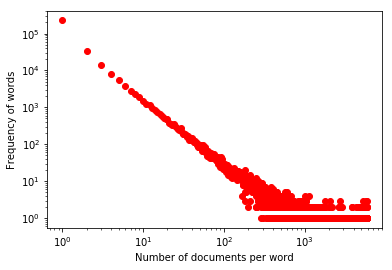

In [8]:
Z = stableibprnd(N = 5806, sigma = 0.71, c = -0.2, alpha = 721, Jmax=350000)
a = Z.sum(axis=0)
a = np.squeeze(np.asarray(a))
unique_elements, counts = np.unique(a, return_counts=True)
plt.plot(unique_elements, counts, "ro")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of documents per word")
plt.ylabel("Frequency of words")


In [37]:
test_mat = mmread("../data/nipspapersmatrix.mtx")
test_mat.data = np.ones(test_mat.data.size)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500


Text(0,0.5,'Frequency of words')

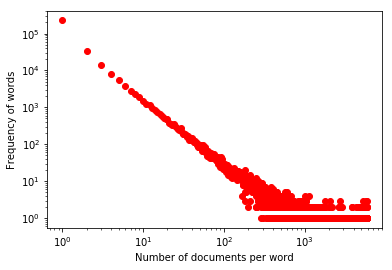

In [10]:
Z_2param = stableibprnd(N = 5806, c = 60.3, alpha = 1168, sigma=0, Jmax=350000)

b = Z_2param.sum(axis=0)
b = np.squeeze(np.asarray(b))
unique, counts_words = np.unique(b, return_counts=True)

plt.plot(unique, counts_words, "ro")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of documents per word")
plt.ylabel("Frequency of words")

In [50]:
data = test_mat.sum(axis=0)
data =np.squeeze(np.asarray(data))
unique_data, counts_data = np.unique(data, return_counts=True)

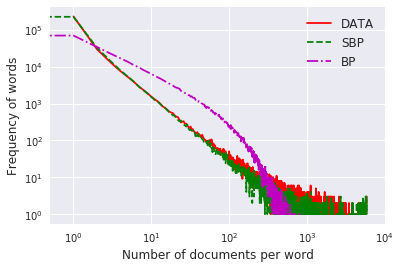

In [60]:
sns.set()
fig=plt.figure()
plt.plot(unique_data, counts_data, color="r", label="DATA") # real data
plt.plot(unique_elements, counts, '--', color="g", label="SBP") # 3 param
plt.plot(unique, counts_words, '-.', color="m", label="BP") # 2 param

plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of documents per word", size=12)
plt.ylabel("Frequency of words", size=12)
plt.legend(prop={'size': 12})
axes = plt.gca()
axes.set_xlim([0.5,10000])
plt.show()
fig.savefig("20newsgroups_natalia.pdf", bbox_inches='tight')